# SVM
A Support Vector Machine (SVM) can perform linear or nonlinear classification, regression, and outlier detection. SVMs are well suited for classification of complex small- or medium-sized datasets.

In SVM, we try to find the best line/hyperplane that split the points, and in order to do that we should always calculate the margin between the splitted points.Remember that the best hyperplane is the one that has the biggest margin, which is pretty far away from the points.

https://scikit-learn.org/stable/modules/svm.html

## 1. Linear SVM
The two classes can clearly be separated easily with a straight line (they are linearly separable). In the linearly separable case, some data points will always fall exactly on the margins. These points are called support vectors. You can think of an SVM classifier as fitting the widest possible street (represented by the parallel lines that go through margins) between the classes. This is called large margin classification.


If we strictly impose that all instances must be off the street and on the right side, this is called hard margin classification. (There are two main issues with hard margin classification. First, it only works if the data is linearly separable. Second, it is sensitive to outliers.)

To avoid these issues, use a more flexible model. The objective is to find a good balance between keeping the street as large as possible and limiting the margin violations (i.e., instances that end up in the middle of the street or even on the wrong side). This is called soft margin classification.



In [3]:
from sklearn.svm import SVC
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)] # petal length, petal width
y = iris["target"]
setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]
# SVM Classifier model
svm_clf = SVC(kernel="linear", C=10_000_000)
svm_clf.fit(X, y)

SVC(C=10000000, kernel='linear')

In [4]:
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
  w = svm_clf.coef_[0]
  b = svm_clf.intercept_[0]
  x0 = np.linspace(xmin, xmax, 200)
  decision_boundary = -w[0]/w[1] * x0 - b/w[1]
  margin = 1/w[1]
  gutter_up = decision_boundary + margin
  gutter_down = decision_boundary - margin
  svs = svm_clf.support_vectors_
  plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors="#FFAAAA")
  plt.plot(x0, decision_boundary, "k-", linewidth=2)
  plt.plot(x0, gutter_up, "k--", linewidth=2)
  plt.plot(x0, gutter_down, "k--", linewidth=2)

def plot_dataset(X, y, axes):
  plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
  plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
  plt.axis(axes)
  plt.grid(True, which="both")
  plt.xlabel(r"$x_1$", fontsize=20)
  plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

def plot_predictions(clf, axes):
  x0s = np.linspace(axes[0], axes[1], 100)
  x1s = np.linspace(axes[2], axes[3], 100)
  x0, x1 = np.meshgrid(x0s, x1s)
  X = np.c_[x0.ravel(), x1.ravel()]
  y_pred = clf.predict(X).reshape(x0.shape)
  y_decision = clf.decision_function(X).reshape(x0.shape)
  plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
  plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)


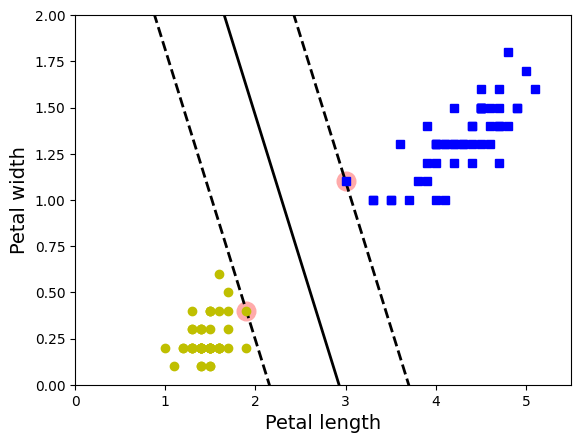

In [5]:
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([0, 5.5, 0, 2])
plt.show()

In [6]:
svm_clf.predict([[5.5, 1.7]])

array([1])

But we could use the SVC class with a linear kernel. `SVC(kernel="linear", C=1)`

SVMs are also very sensitive to the feature scales. Sometimes it needs feature scaling for the decision boundary to work correctly.

### Task 1
Use StandardScaler in python to scale the input features, and plot the results before and after scaling?

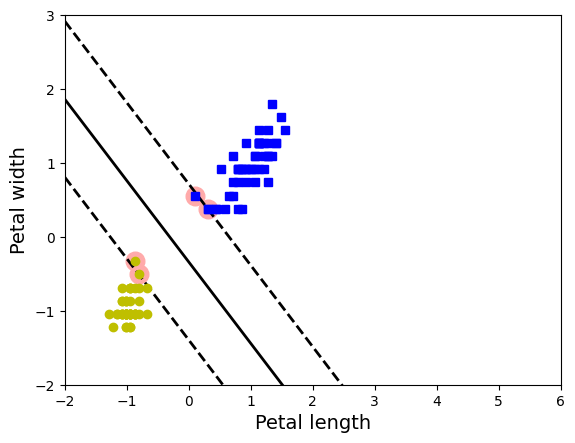

In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
svm_clf1 = SVC(kernel="linear", C=1)
svm_clf2 = SVC(kernel="linear", C=1)

# svm with scaler
X_scaled = scaler.fit_transform(X, y)

svm_clf1.fit(X_scaled, y)
svm_clf1.predict([[5.5, 1.7]])

# svm without scaler

svm_clf2.fit(X, y)
svm_clf2.predict([[5.5, 1.7]])

# plot svm with scaler

plot_svc_decision_boundary(svm_clf1, -2, 6)
plt.plot(X_scaled[:, 0][y==1], X_scaled[:, 1][y==1], "bs")
plt.plot(X_scaled[:, 0][y==0], X_scaled[:, 1][y==0], "yo")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([-2, 6, -2, 3])
plt.show()


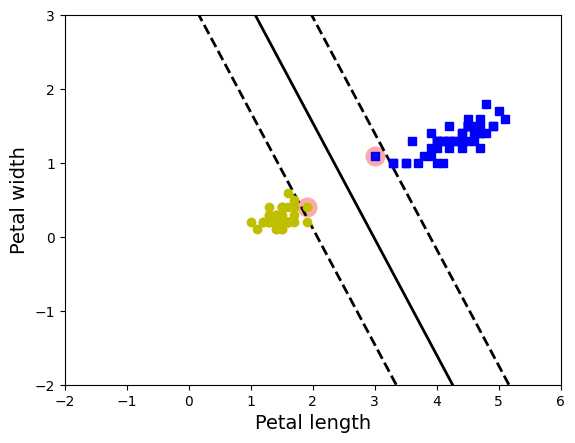

In [32]:
plot_svc_decision_boundary(svm_clf2, -2, 6)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([-2, 6, -2, 3])
plt.show()

## Soft margin classification


When we want to force, that all instances will be to the right from the line and its borders, we will call it hard margin classification (but it works only on linearly separable data and is very sensitive to outliers).

To tackle these problems we can use more flexible model which finds a good balance between keeping the borders wide as possible and minimizing the margin violations. And this is called soft margin classification.

In scikit it is possible to control that balance by using the C hyperparameter. Small value of C leads to wider borders with more margin violations and high value of C will imply less margin violations with smaller margin. In case of model overfitting you can regularize it by reducing the C hyperparameter.

### Task 2
Find best value of C for previous experiment?

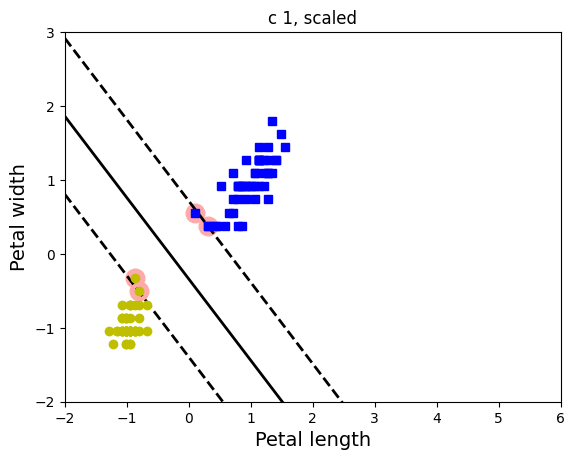

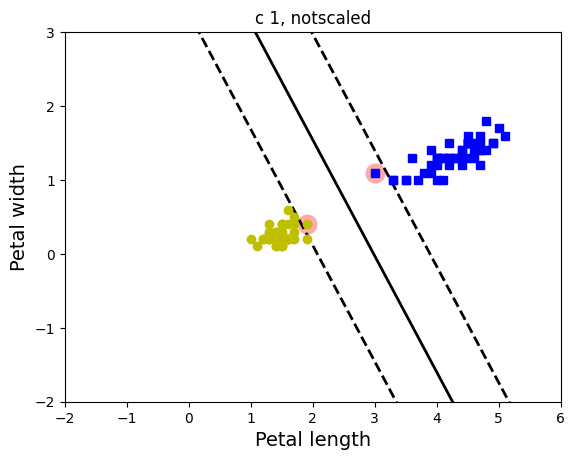

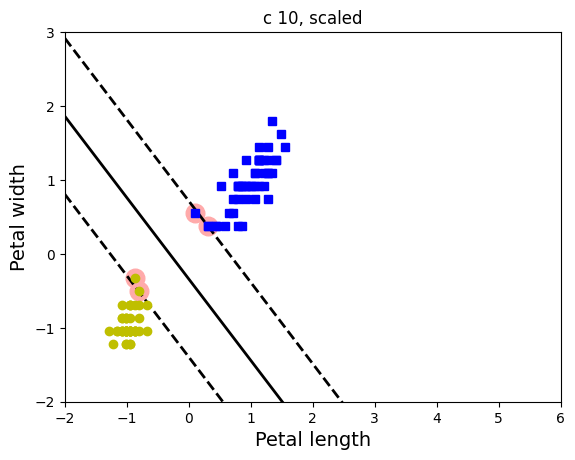

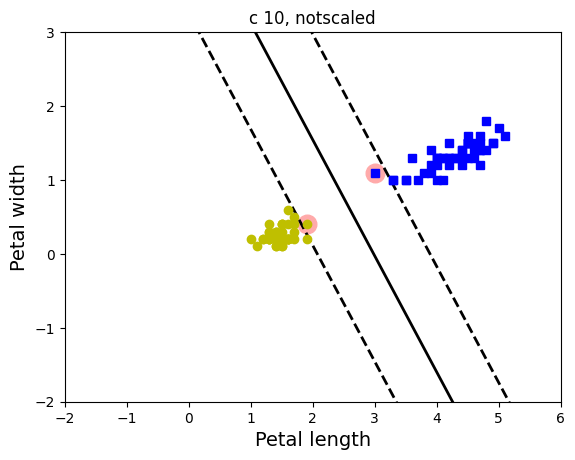

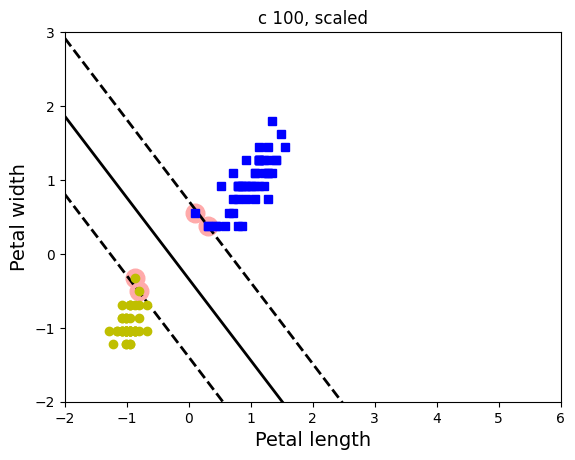

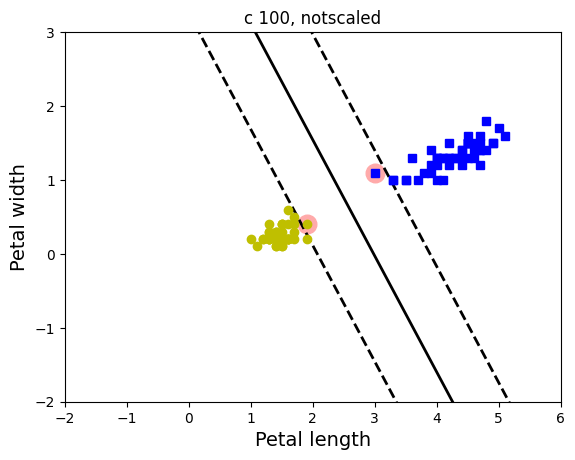

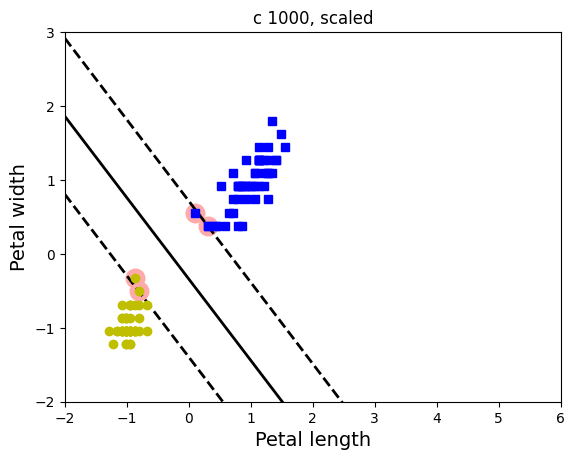

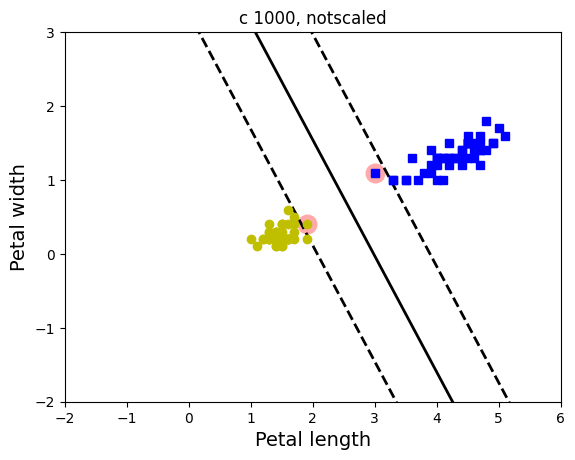

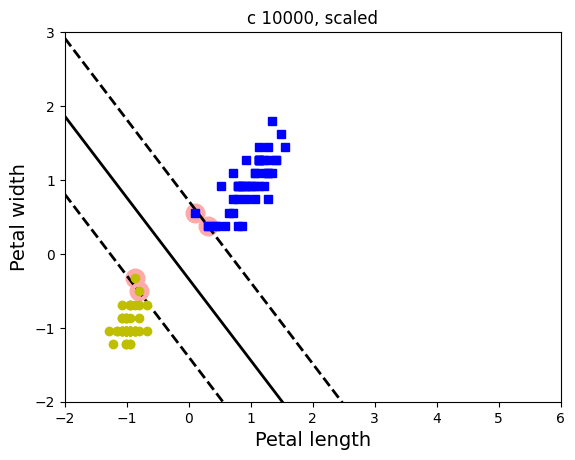

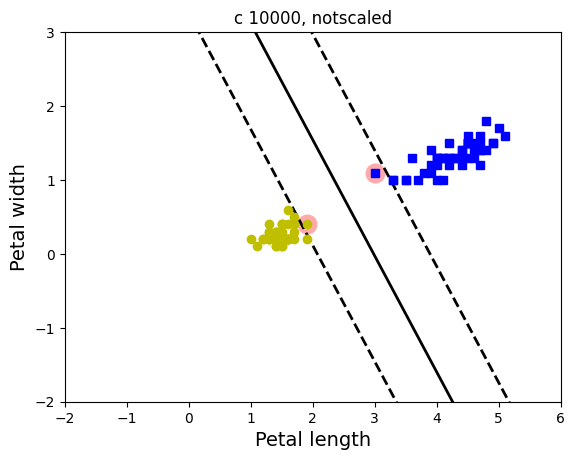

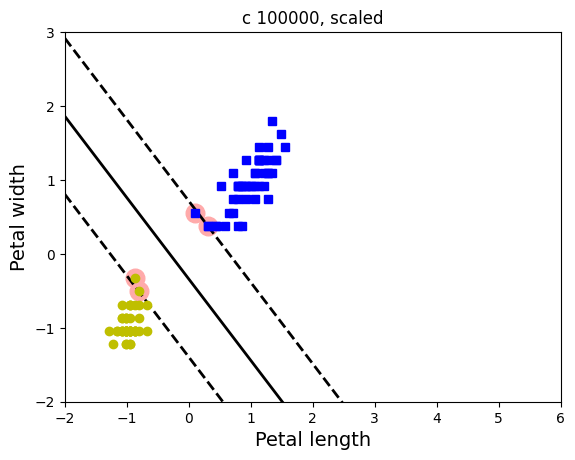

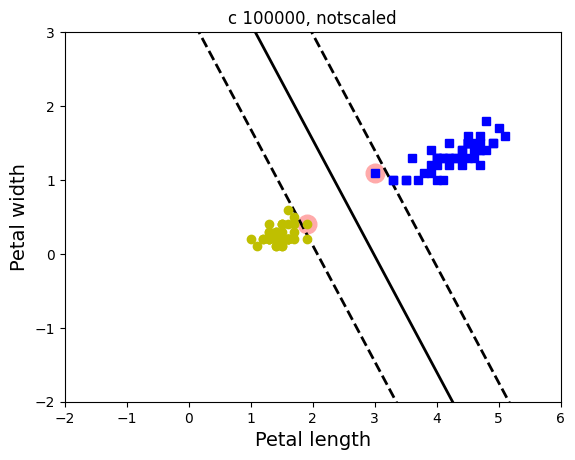

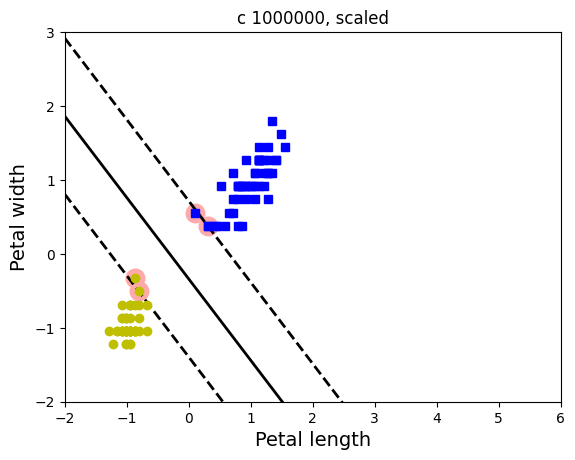

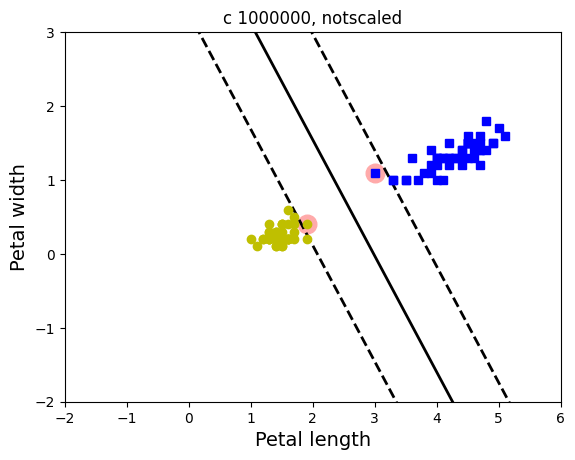

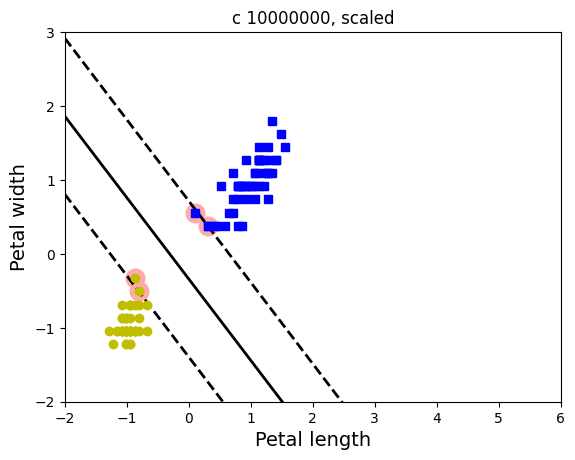

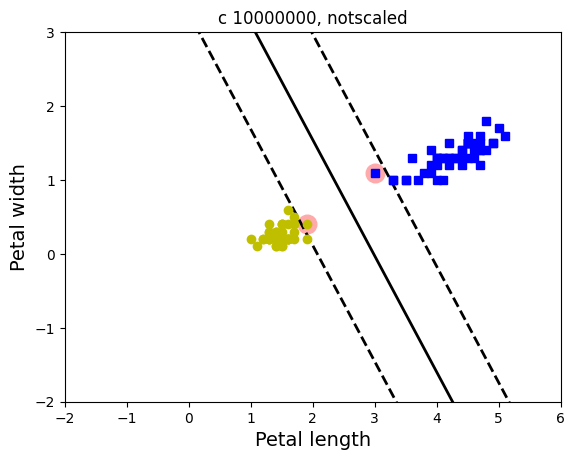

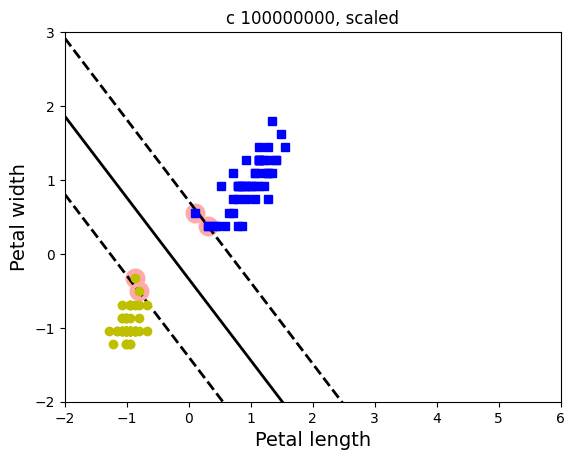

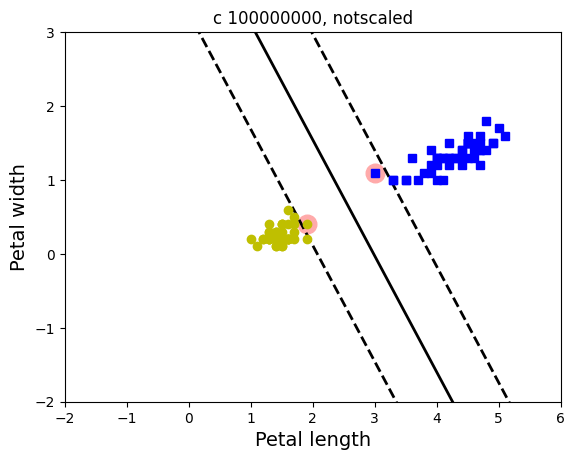

In [34]:
possible_c = [1, 10, 100, 1000, 10_000, 100_000, 1_000_000, 10_000_000, 100_000_000]

for c in possible_c:

  scaler = StandardScaler()
  svm_clf1 = SVC(kernel="linear", C=1)
  svm_clf2 = SVC(kernel="linear", C=1)

  # svm with scaler
  X_scaled = scaler.fit_transform(X, y)

  svm_clf1.fit(X_scaled, y)
  svm_clf1.predict([[5.5, 1.7]])

  # svm without scaler

  svm_clf2.fit(X, y)
  svm_clf2.predict([[5.5, 1.7]])

  # plot svm with scaler

  plt.clf()
  plot_svc_decision_boundary(svm_clf1, -2, 6)
  plt.plot(X_scaled[:, 0][y==1], X_scaled[:, 1][y==1], "bs")
  plt.plot(X_scaled[:, 0][y==0], X_scaled[:, 1][y==0], "yo")
  plt.title(f'c {c}, scaled')
  plt.xlabel("Petal length", fontsize=14)
  plt.ylabel("Petal width", fontsize=14)
  plt.axis([-2, 6, -2, 3])
  plt.show()

  plt.clf()
  plot_svc_decision_boundary(svm_clf2, -2, 6)
  plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
  plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
  plt.title(f'c {c}, notscaled')
  plt.xlabel("Petal length", fontsize=14)
  plt.ylabel("Petal width", fontsize=14)
  plt.axis([-2, 6, -2, 3])
  plt.show()

Większe mają lepszą granicę decyzyjną, ale od pewnego momentu nie widać już różnicy


##2. Nonlinear SVM Classification
Many datasets are not even close to being linearly separable as in example below. But if we add a second feature x2 = (x1)2, the resulting 2D dataset is perfectly linearly separable.

But when using SVMs we can apply the kernel trick. The kernel trick makes it possible to get the same result as if we had added many polynomial features, even with very high-degree polynomials, without actually having to add them.


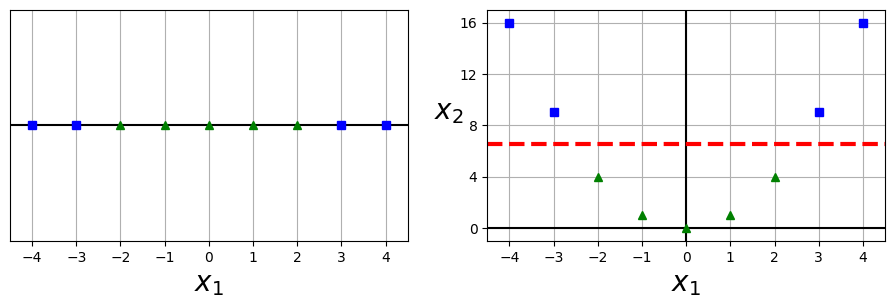

In [35]:
X1D = np.linspace(-4, 4, 9).reshape(-1, 1)
X2D = np.c_[X1D, X1D**2]
y = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(10, 3))

plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.plot(X1D[:, 0][y==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][y==1], np.zeros(5), "g^")
plt.gca().get_yaxis().set_ticks([])
plt.xlabel(r"$x_1$", fontsize=20)
plt.axis([-4.5, 4.5, -0.2, 0.2])

plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(X2D[:, 0][y==0], X2D[:, 1][y==0], "bs")
plt.plot(X2D[:, 0][y==1], X2D[:, 1][y==1], "g^")
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"$x_2$  ", fontsize=20, rotation=0)
plt.gca().get_yaxis().set_ticks([0, 4, 8, 12, 16])
plt.plot([-4.5, 4.5], [6.5, 6.5], "r--", linewidth=3)
plt.axis([-4.5, 4.5, -1, 17])

plt.subplots_adjust(right=1)
plt.show()

In [36]:
from sklearn.svm import SVC
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

X, y = make_moons(n_samples=100, noise=0.15, random_state=42)
poly_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
    ])
poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

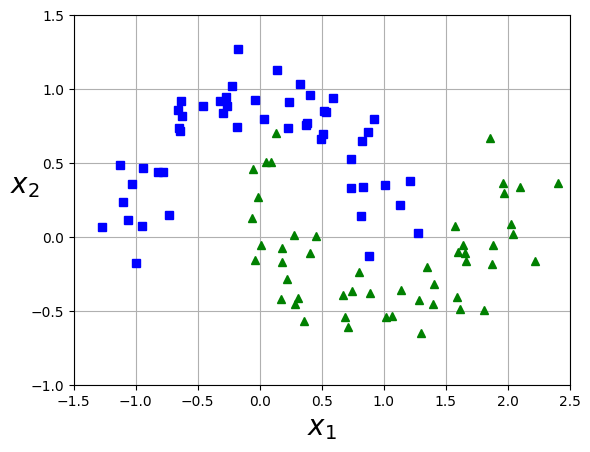

In [37]:
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

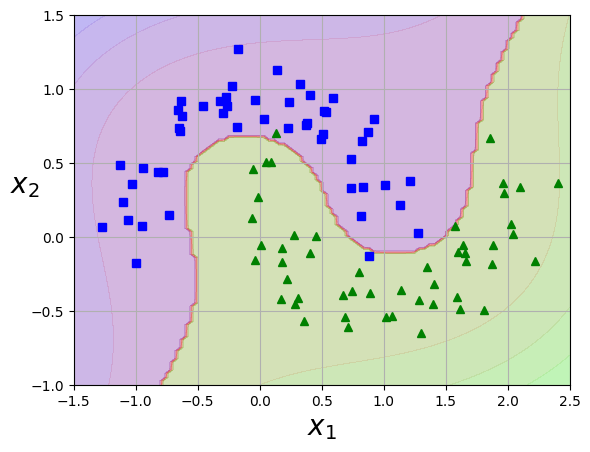

In [38]:
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

### Task 3
There are many types of kernels in Python, read about Polynomial Kernel and Gaussian RBF Kernel and explain the purpose degree, coef0, gamma and c parameters, try to find the best values for those parameters to classify Iris data, plot the results?

## Polynomial Kernel

The Polynomial Kernel is used to handle non-linear classification problems. It computes the similarity between two data points by raising the dot product of the original feature vectors to a certain power, specified by the 'degree' parameter. This allows the SVM to capture complex relationships between data points.

-  The 'degree' parameter determines the degree of the polynomial. It controls the level of non-linearity introduced into the decision boundary. Higher values of 'degree' lead to more complex decision boundaries.

-  The 'coef0' parameter is a constant term in the kernel function. It affects the influence of higher-degree terms in the polynomial. It can be used to adjust the importance of different degrees in the polynomial.

- The 'C' parameter controls the trade-off between maximizing the margin (large C) and minimizing classification errors (small C) in the SVM. A smaller C allows for a larger margin but may result in some misclassifications, while a larger C reduces the margin but tries to minimize misclassifications.



In [55]:
from sklearn.model_selection import GridSearchCV

param_grid = [
        {'svm_clf__degree': [1, 2, 3, 4, 5, 6], 'svm_clf__coef0': [1, 2, 3, 4, 5, 6, 7, 8], 'svm_clf__C':[1, 2, 3, 4, 5, 6]}

    ]

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)] # petal length, petal width
y = iris["target"]
setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

poly_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
    ])

grid_search = GridSearchCV(poly_kernel_svm_clf, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid_search.fit(X, y)

print(grid_search.best_params_)

print(grid_search.best_estimator_)


{'svm_clf__C': 1, 'svm_clf__coef0': 1, 'svm_clf__degree': 1}
Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=1, coef0=1, degree=1, kernel='poly'))])


### Gaussion RBF Kernel

The Gaussian RBF Kernel is a popular choice for handling non-linear data. It maps data points into an infinite-dimensional space by computing the similarity between them based on the Gaussian distribution. This kernel is highly effective in capturing complex patterns in the data.

- The 'gamma' parameter controls the shape of the Gaussian function. It determines the reach or influence of each data point. Smaller values of 'gamma' make the influence of a data point more widespread, leading to smoother decision boundaries. Larger values make the influence more localized and can result in more intricate decision boundaries.

- As with the Polynomial Kernel, the 'C' parameter in the Gaussian RBF Kernel controls the trade-off between maximizing the margin and minimizing classification errors. A smaller C leads to a larger margin, while a larger C tries to minimize misclassifications.

In [57]:
from sklearn.model_selection import GridSearchCV

param_grid = [
        {'svm_clf__gamma': [0.001, 0.01, 0.1, 1, 10, 100], 'svm_clf__C': [0.001, 0.01, 0.1, 1, 10, 100]}

    ]

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)] # petal length, petal width
y = iris["target"]
setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

rbf_kernel_svm_clf = Pipeline([

        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))

    ])

grid_search = GridSearchCV(rbf_kernel_svm_clf, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid_search.fit(X, y)

print(grid_search.best_params_)

print(grid_search.best_estimator_)


{'svm_clf__C': 0.001, 'svm_clf__gamma': 0.001}
Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=0.001))])


#2. SVM regression



In [39]:
np.random.seed(42)
m = 50
X = 2 * np.random.rand(m, 1)
y = (4 + 3 * X + np.random.randn(m, 1)).ravel()

In [40]:
from sklearn.svm import LinearSVR

svm_reg = LinearSVR(epsilon=1.5, random_state=42)
svm_reg.fit(X, y)

LinearSVR(epsilon=1.5, random_state=42)

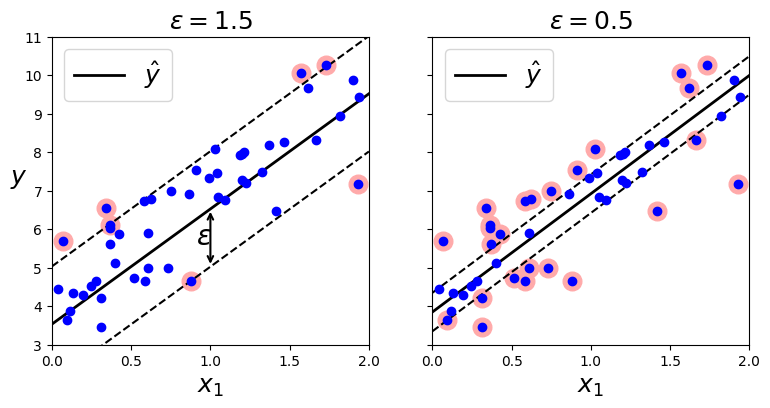

In [44]:
svm_reg1 = LinearSVR(epsilon=1.5, random_state=42)
svm_reg2 = LinearSVR(epsilon=0.5, random_state=42)
svm_reg1.fit(X, y)
svm_reg2.fit(X, y)

def find_support_vectors(svm_reg, X, y):
    y_pred = svm_reg.predict(X)
    off_margin = (np.abs(y - y_pred) >= svm_reg.epsilon)
    return np.argwhere(off_margin)

svm_reg1.support_ = find_support_vectors(svm_reg1, X, y)
svm_reg2.support_ = find_support_vectors(svm_reg2, X, y)

eps_x1 = 1
eps_y_pred = svm_reg1.predict([[eps_x1]])

def plot_svm_regression(svm_reg, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$")
    plt.plot(x1s, y_pred + svm_reg.epsilon, "k--")
    plt.plot(x1s, y_pred - svm_reg.epsilon, "k--")
    plt.scatter(X[svm_reg.support_], y[svm_reg.support_], s=180, facecolors='#FFAAAA')
    plt.plot(X, y, "bo")
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.legend(loc="upper left", fontsize=18)
    plt.axis(axes)

fig, axes = plt.subplots(ncols=2, figsize=(9, 4), sharey=True)
plt.sca(axes[0])
plot_svm_regression(svm_reg1, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
#plt.plot([eps_x1, eps_x1], [eps_y_pred, eps_y_pred - svm_reg1.epsilon], "k-", linewidth=2)
plt.annotate(
        '', xy=(eps_x1, eps_y_pred), xycoords='data',
        xytext=(eps_x1, eps_y_pred - svm_reg1.epsilon),
        textcoords='data', arrowprops={'arrowstyle': '<->', 'linewidth': 1.5}
    )
plt.text(0.91, 5.6, r"$\epsilon$", fontsize=20)
plt.sca(axes[1])
plot_svm_regression(svm_reg2, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg2.epsilon), fontsize=18)
plt.savefig("svm_regression_plot")
plt.show()

To use SVMs for regression instead of classification, the trick is to reverse the objective: instead of trying to fit the largest possible street between two classes while limiting margin violations, SVM Regression tries to fit as many instances as possible on the street while limiting margin violations (i.e., instances off the street). The width of the street is controlled by a hyperparameter, ϵ.

In [45]:
from sklearn.svm import LinearSVR

svm_reg = LinearSVR(epsilon=1.5)
svm_reg.fit(X, y)

LinearSVR(epsilon=1.5)

To tackle nonlinear regression tasks, you can use a kernelized SVM model.

In [46]:
from sklearn.svm import SVR

svm_poly_reg = SVR(kernel="poly", degree=2, C=100, epsilon=0.1)
svm_poly_reg.fit(X, y)

SVR(C=100, degree=2, kernel='poly')